Import Modules

In [102]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


Loading Data

In [132]:
# Read the data
base_path = "dataset"
train = pd.read_csv(os.path.join(base_path, "train.csv"))
test = pd.read_csv(os.path.join(base_path, "test.csv"))
print(f"Count of train data: {len(train)}")
print(f"Count of test data: {len(test)}")
train.head()

Count of train data: 891
Count of test data: 418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Required Functions

In [104]:
def one_hot_encoding_sklearn(data_frame, column_name, sparse=False, drop_column=True):
    """
    One-hot encoding for categorical variables
    :param df: dataframe
    :param column_name: column name
    :return: dataframe with one-hot encoding
    """

    one_hot_encoder = OneHotEncoder(sparse=False)
    df_encoded = one_hot_encoder.fit_transform(data_frame[[column_name]])
    df_encoded = pd.DataFrame(df_encoded, columns=one_hot_encoder.categories_[0])
    data_frame = pd.concat([data_frame, df_encoded], axis=1)
    if drop_column:
        data_frame = data_frame.drop([column_name], axis=1)
    return data_frame

Data Analysis

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
# Remove the columns that are not useful for the model
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Filling Missing Values

In [107]:
train["Age"] = train["Age"].fillna(train["Age"].median()) # Fill the missing values with the median
train["Embarked"] = train["Embarked"].fillna("S") # Fill the missing values with the most common value
# train["Cabin"] = train["Cabin"].fillna("B96") # Fill the missing values with the most common value

In [108]:
train = one_hot_encoding_sklearn(train, "Embarked", sparse=False, drop_column=True)
# train = one_hot_encoding_sklearn(train, "Cabin", sparse=False, drop_column=True)
train = one_hot_encoding_sklearn(train, "Sex", sparse=False, drop_column=True)
train.head()

C:\Users\Nikhil Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nikhil Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [109]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   C         891 non-null    float64
 7   Q         891 non-null    float64
 8   S         891 non-null    float64
 9   female    891 non-null    float64
 10  male      891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


# Model Implimnetation

In [111]:
req_columns = train.columns
req_columns = req_columns.drop("Survived")
X_train, X_test, y_train, y_test = train_test_split(train[req_columns], train[["Survived"]], test_size=0.2, random_state=42)

<Axes: xlabel='depth', ylabel='accuracy_test'>

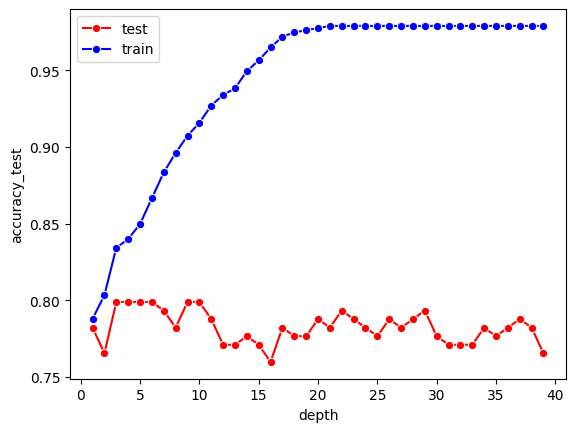

In [112]:
base = []
accuracy_test = []
accuracy_train = []
for depth in range(1,40):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    base.append(depth)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    accuracy_train.append(accuracy_score(y_train, clf.predict(X_train)))

df = pd.DataFrame({"depth": base, "accuracy_test": accuracy_test, "accuracy_train": accuracy_train})

sns.lineplot(x="depth", y="accuracy_test", data=df, color="red", label="test", legend="full", marker="o")
sns.lineplot(x="depth", y="accuracy_train", data=df, color="blue", label="train", legend="full", marker="o")

As we can observe with increase in depth the model is overfitting. So we will choose the depth as 5 or 6 which is giving us best results.
Also we will try to choose minimum depth make a simple model.

Model with depth of 5

In [115]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7988826815642458

Implimentation on Test Data

In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [133]:
# Remove the columns that are not useful for the model
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [134]:
test["Age"] = test["Age"].fillna(test["Age"].median()) # Fill the missing values with the median
test["Fare"] = test["Fare"].fillna(test["Fare"].median()) # Fill the missing values with the median
test["Embarked"] = test["Embarked"].fillna("S") # Fill the missing values with the most common value
# train["Cabin"] = train["Cabin"].fillna("B96") # Fill the missing values with the most common value

In [135]:
test = one_hot_encoding_sklearn(test, "Embarked", sparse=False, drop_column=True)
test = one_hot_encoding_sklearn(test, "Sex", sparse=False, drop_column=True)
test.head()

C:\Users\Nikhil Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Nikhil Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [137]:
y_test_pred = clf.predict(test[req_columns])
df_y = pd.DataFrame(y_test_pred, columns=["Survived"])
test = pd.concat([test, df_y], axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Survived
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0,0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0,1
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0,0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0,0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0,0


In [138]:
test[["PassengerId", "Survived"]].to_csv("submission.csv", index=False)